## Data Visualization

In [13]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Load and explore the dataset

In [14]:
import pandas as pd

# Load raw dataset
df_clean = pd.read_csv('metacritic_dataset_clean.csv')
# Convert 'release_date' to datetime
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'], errors='coerce')
# Convert publishers to list
df_clean['publisher'] = df_clean['publisher'].apply(lambda x: eval(x) if pd.notnull(x) else [])
# Display dataset information
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22224 entries, 0 to 22223
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          22224 non-null  object        
 1   platform      22224 non-null  object        
 2   release_date  22224 non-null  datetime64[ns]
 3   metascore     22224 non-null  float64       
 4   user_score    22224 non-null  float64       
 5   developer     22224 non-null  object        
 6   publisher     22224 non-null  object        
 7   genre         22224 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 1.4+ MB


In [15]:
def count_types(col):
    type_counts = df_clean[col].apply(lambda x: type(x).__name__).value_counts()
    print(f"Data type counts per column '{col}':")
    print(type_counts)

count_types('name')
count_types('platform')
count_types('release_date')
count_types('metascore')
count_types('user_score')
count_types('developer')
count_types('publisher')
count_types('genre')

Data type counts per column 'name':
name
str    22224
Name: count, dtype: int64
Data type counts per column 'platform':
platform
str    22224
Name: count, dtype: int64
Data type counts per column 'release_date':
release_date
Timestamp    22224
Name: count, dtype: int64
Data type counts per column 'metascore':
metascore
float    22224
Name: count, dtype: int64
Data type counts per column 'user_score':
user_score
float    22224
Name: count, dtype: int64
Data type counts per column 'developer':
developer
str    22224
Name: count, dtype: int64
Data type counts per column 'publisher':
publisher
list    22224
Name: count, dtype: int64
Data type counts per column 'genre':
genre
str    22224
Name: count, dtype: int64


## Metascore and User Score over the Years

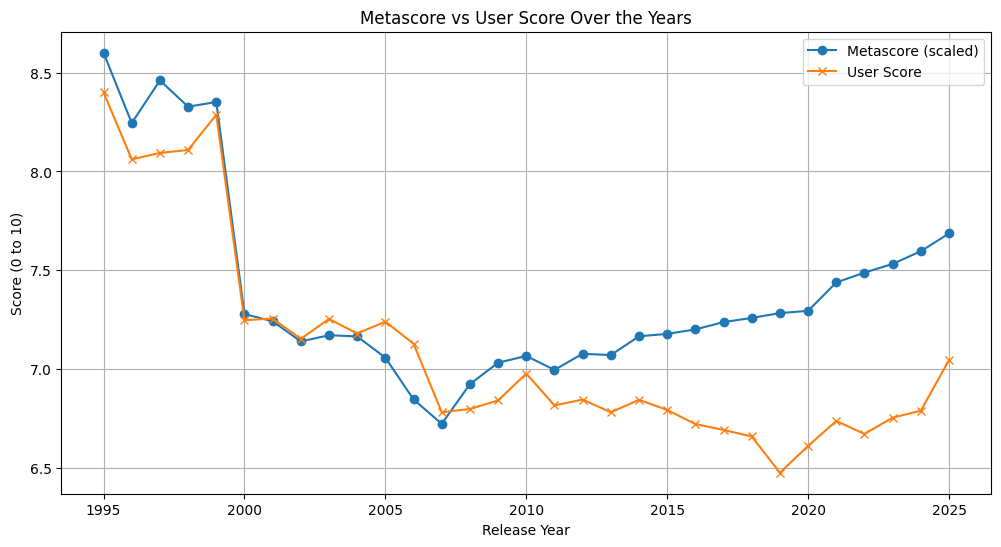

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# Convert Metascore to 0 to 10 scale to match User Score

df_clean['metascore_scaled'] = df_clean['metascore'] / 10
df_clean["year"] = df_clean['release_date'].dt.year
# Group by year and calculate average scores
metascore_scaled_by_year = df_clean.groupby('year')['metascore_scaled'].mean()
user_score_by_year = df_clean.groupby('year')['user_score'].mean()
# Plot comparison of Metascore and User Score over the years
plt.figure(figsize=(12, 6))
plt.plot(metascore_scaled_by_year.index, metascore_scaled_by_year, label='Metascore (scaled)', marker='o')
plt.plot(user_score_by_year.index, user_score_by_year, label='User Score', marker='x')
plt.title('Metascore vs User Score Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Score (0 to 10)')
plt.legend()
plt.grid()
plt.show()

## Genre distribution

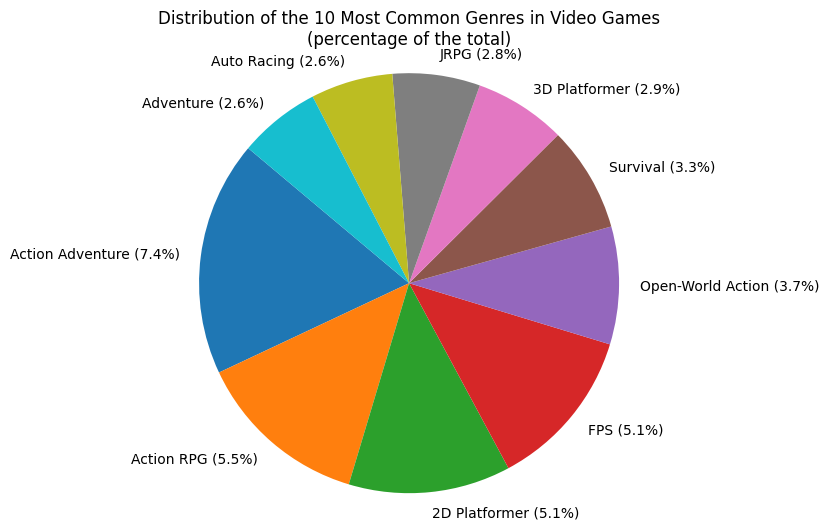

In [17]:
# Pie chart of the distribution of the 10 most common genres, showing percentages relative to the original total
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Count the frequency of each genre
all_genres = df_clean['genre'].explode()
genre_counts = Counter(all_genres)
genre_counts = dict(genre_counts.most_common(10))  # Get the 10 most common genres

total = len(all_genres)

labels = [f"{g} ({c/total*100:.1f}%)" for g, c in genre_counts.items()]
sizes = list(genre_counts.values())

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, startangle=140)
plt.title('Distribution of the 10 Most Common Genres in Video Games\n(percentage of the total)')
plt.axis('equal')
plt.show()

## Creation of "metagenres"

In [18]:
metagenres_dict = {
    'Shooter': ['FPS', 'Tactical FPS', 'Third Person Shooter', 'Rail Shooter', 'Tactical Third Person Shooter', 'Marine Combat Sim', 'Artillery'],
    'Action': ['Action', 'Action Adventure', 'Linear Action Adventure', 'Open-World Action'],
    'Arcade': ['Arcade', 'Pinball', 'Light Gun', '3D Beat-\'Em-Up', "2D Beat-\'Em-Up", 'Top-Down Shoot-\'Em-Up', "Horizontal Shoot-\'Em-Up", 'Vertical Shoot-\'Em-Up'],
    'Fighting': ['2D Fighting', '3D Fighting', 'Wrestling'],
    'Adventure': ['Adventure', 'Text Adventure', 'Third-Person Adventure', 'First-Person Adventure'],
    'Platformer': ['3D Platformer', '2D Platformer'],
    'Simulation': ['Survival', 'Simulation', 'Vehicle Sim', 'Space Sim', 'Train Sim', 'Virtual Life', 'Virtual Career', 'Virtual Pet', 'Management', 'Vehicle Combat Sim',
              'Fishing', 'Hunting', 'Marine Sim', 'Aircraft Sim', 'Space Combat Sim', 'Aircraft Combat Sim', 'Soccer Management'],
    'Racing': ['Auto Racing', 'Auto Racing Sim', 'Racing', 'Racing Sim', 'Horse Racing', 'Future Racing', 'Arcade Racing'],
    'Sports': ['Skating', 'Sports', 'Team Sports', 'Future Sport', 'Combat Sport', 'Individual Sports', 'Future Sport', 'Football Sim', 'Soccer Sim', 'Soccer',
          'Football', 'Biking', 'Basketball', 'Basketball Sim', 'Hockey', 'Hockey Sim', 'Baseball Sim', 'Baseball', 'Tennis', 'Golf', 'Golf Sim',
          'Billiards', 'Athletics', 'Surfing', 'Exercise', 'Bowling', 'Skiing', 'Volleyball', 'Rugby', 'Cricket', 'Dancing'],
    'Strategy': ['Strategy', 'Turn-Based Tactics', 'Real-Time Tactics', 'Command RTS', 'Defense', 'Tycoon'],
    'Puzzle': ['Puzzle', 'Stacking Puzzle', 'Action Puzzle', 'Logic Puzzle', 'Matching Puzzle', 'Trivia', 'Edutainment'],
    'RPG': ['RPG', 'Action RPG', 'JRPG', 'Western RPG', 'Roguelike', 'Metroidvania', 'Trainer RPG', 'MMORPG', 'MOBA'],
    'Graphic Adventure': ['Visual Novel', 'Point-and-Click'],
    'Casual': ['Sandbox', 'Rhythm', 'Application', 'Party', 'Compilation', 'Card Battle', 'Miscellaneous', 'Board'],
    'Other': ['Hidden Object', 'Gambling']
}

In [19]:
# Create metagenre column
def map_metagenres(genre, metagenres_dict=metagenres_dict):
    for meta, subgenres in metagenres_dict.items():
        if genre in subgenres:
            return meta
    return 'Other'

df_clean['metagenre'] = df_clean['genre'].apply(lambda x: map_metagenres(x))

In [20]:
df_clean[["name", "genre", "metagenre"]].head(15)

,name,genre,metagenre
0,The Legend of Zelda: Ocarina of Time,Open-World Action,Action
1,SoulCalibur,3D Fighting,Fighting
2,SoulCalibur,3D Fighting,Fighting
3,SoulCalibur,3D Fighting,Fighting
4,Grand Theft Auto IV,Open-World Action,Action
5,Grand Theft Auto IV,Open-World Action,Action
6,Grand Theft Auto IV,Open-World Action,Action
7,Super Mario Galaxy,3D Platformer,Platformer
8,Super Mario Galaxy 2,3D Platformer,Platformer
9,The Legend of Zelda: Breath of the Wild,Open-World Action,Action


## Time Series - Scores by Genre (top 12)

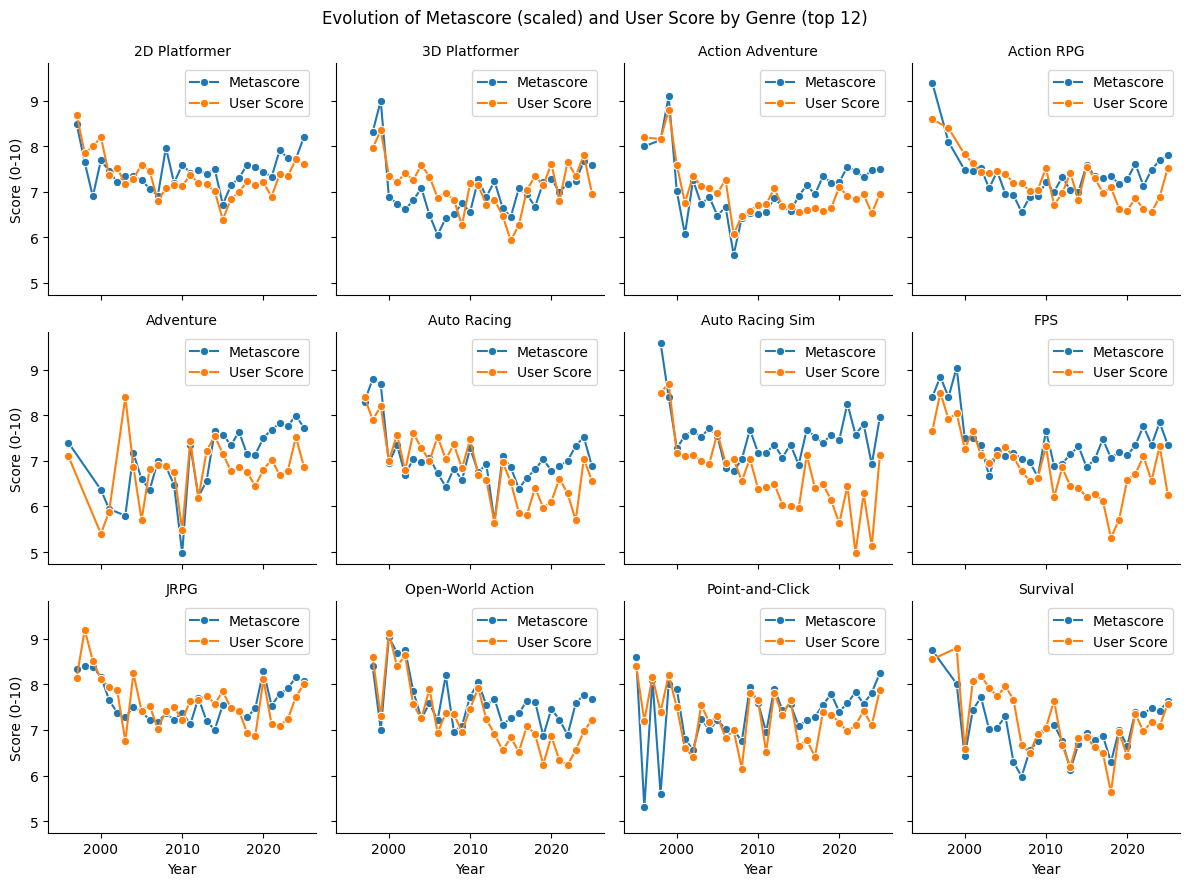

In [21]:
# Small multiples (FacetGrid) of Metascore vs User Score over the years for the top N genres
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data: explode genres and extract year
df_clean['year'] = df_clean['release_date'].dt.year

top_n = 12
top_genres = df_clean['genre'].value_counts().head(top_n).index.tolist()
df_plot = df_clean[df_clean['genre'].isin(top_genres)].copy()

# Add means per year/genre for metascore_scaled and user_score, and count games
agg = (
    df_plot
    .groupby(['genre', 'year'])
    .agg(
        metascore_mean=('metascore_scaled', 'mean'),
        user_score_mean=('user_score', 'mean'),
        n=('metascore', 'count')
    )
    .reset_index()
)

# Draw FacetGrid with both lines per facet
g = sns.FacetGrid(agg, col='genre', col_wrap=4, sharey=True, height=3.0)
g.map_dataframe(sns.lineplot, x='year', y='metascore_mean', marker='o', color='C0', label='Metascore')
g.map_dataframe(sns.lineplot, x='year', y='user_score_mean', marker='o', color='C1', label='User Score')

g.set_axis_labels('Year', 'Score (0-10)')
g.set_titles('{col_name}')
for ax in g.axes.flat:
    ax.legend()  # Automatically generate legend based on labels
plt.subplots_adjust(top=0.92)
g.figure.suptitle(f'Evolution of Metascore (scaled) and User Score by Genre (top {top_n})')
plt.show()

## Time Series - Scores by Metagenre

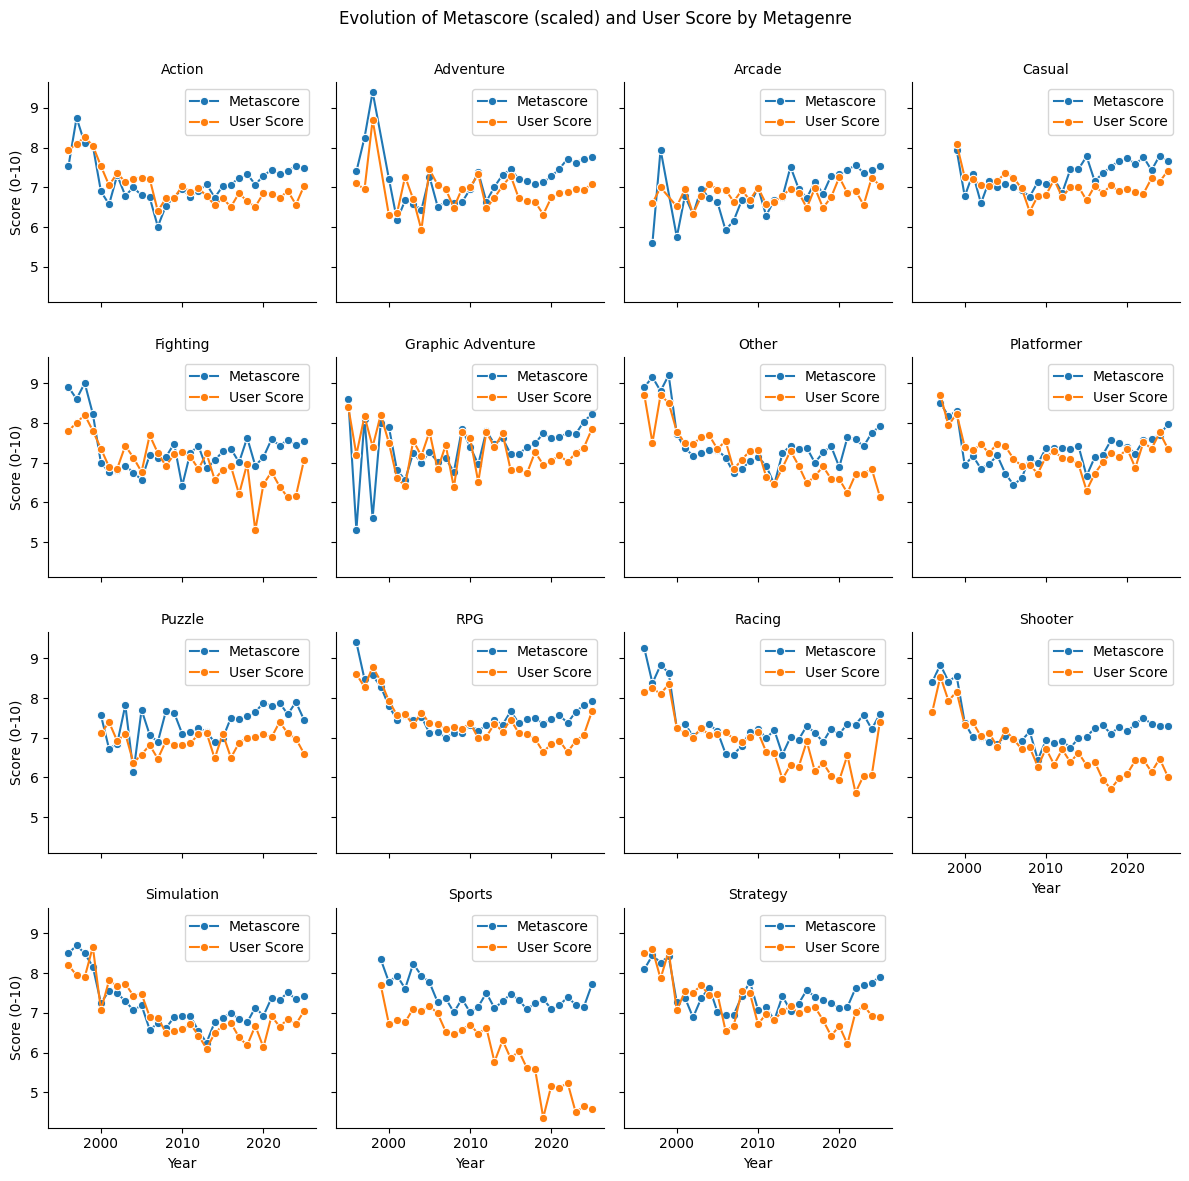

In [25]:
# Small multiples (FacetGrid) to plot evolution of Metascore vs User Score over the years for metagenres
import seaborn as sns
import matplotlib.pyplot as plt

# Add means per year/metagenre for metascore_scaled and user_score, and count games
agg = (
    df_clean
    .groupby(['metagenre', 'year'])
    .agg(
        metascore_mean=('metascore_scaled', 'mean'),
        user_score_mean=('user_score', 'mean'),
        n=('metascore', 'count')
    )
    .reset_index()
)

# Draw FacetGrid with both lines per facet
g = sns.FacetGrid(agg, col='metagenre', col_wrap=4, sharey=True, height=3.0)
g.map_dataframe(sns.lineplot, x='year', y='metascore_mean', marker='o', color='C0', label='Metascore')
g.map_dataframe(sns.lineplot, x='year', y='user_score_mean', marker='o', color='C1', label='User Score')

g.set_axis_labels('Year', 'Score (0-10)')
g.set_titles('{col_name}')
for ax in g.axes.flat:
    ax.legend()  # Automatically generate legend based on labels
plt.subplots_adjust(top=0.92)
g.figure.suptitle(f'Evolution of Metascore (scaled) and User Score by Metagenre')
plt.show()

## Generate Manufacturer info

In [27]:
manufacturers_dict = {
    'Nintendo': ['Nintendo 64', 'GameCube', 'Wii', 'Wii U', 'Nintendo Switch', 'Nintendo Switch 2', 'Game Boy Advance', 'DS', '3DS'],
    'Sony': ['PlayStation', 'PlayStation 2', 'PlayStation 3', 'PlayStation 4', 'PlayStation 5', 'PSP', 'PlayStation Vita'],
    'Microsoft': ['Xbox', 'Xbox 360', 'Xbox One', 'Xbox Series X'],
    'Sega': ['Dreamcast'],
    'Apple': ['iOS (iPhone/iPad)'],
    'VR': ['Meta Quest'],
    'PC': ['PC']
}

In [28]:
# Create manufacturer column
def map_manufacturers(platform, manufacturers_dict=manufacturers_dict):
    for manufacturer, platforms in manufacturers_dict.items():
        if platform in platforms:
            return manufacturer
    return 'Other'

df_clean['manufacturer'] = df_clean['platform'].apply(lambda x: map_manufacturers(x))

In [15]:
df_clean[["name", "platform", "manufacturer"]].head(15)

,name,platform,manufacturer
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,Nintendo
1,SoulCalibur,Dreamcast,Sega
2,SoulCalibur,iOS (iPhone/iPad),Apple
3,SoulCalibur,Xbox 360,Microsoft
4,Grand Theft Auto IV,PlayStation 3,Sony
5,Grand Theft Auto IV,Xbox 360,Microsoft
6,Grand Theft Auto IV,PC,PC
7,Super Mario Galaxy,Wii,Nintendo
8,Super Mario Galaxy 2,Wii,Nintendo
9,The Legend of Zelda: Breath of the Wild,Wii U,Nintendo


In [19]:
# See all Sega rows ordered by year
df_clean[df_clean['manufacturer'] == 'Sega'].sort_values('year')

,name,platform,release_date,metascore,user_score,developer,publisher,genre,year,metascore_scaled,metagenre,manufacturer
66,Half-Life,Dreamcast,1998-11-19,87.0,8.6,Valve Software,"[Sierra Entertainment, Valve Software, Source ...",FPS,1998,8.7,Shooter,Sega
2210,Tom Clancy's Rainbow Six,Dreamcast,1998-08-21,85.0,8.0,Red Storm Entertainment,"[Red Storm Entertainment, Ubisoft, Frogster In...",Tactical FPS,1998,8.5,Shooter,Sega
505,Resident Evil 3: Nemesis,Dreamcast,1999-11-11,79.0,8.9,Capcom,"[Capcom, Eidos Interactive]",Survival,1999,7.9,Simulation,Sega
1,SoulCalibur,Dreamcast,1999-09-08,98.0,7.6,Namco,[Namco],3D Fighting,1999,9.8,Fighting,Sega
375,Tony Hawk's Pro Skater,Dreamcast,1999-09-29,92.0,8.0,Neversoft Entertainment,"[Activision, Success]",Skating,1999,9.2,Sports,Sega
...,...,...,...,...,...,...,...,...,...,...,...,...
18700,Rayman 2: The Great Escape,Dreamcast,2011-03-22,58.0,6.6,Ubisoft Casablanca,[Ubisoft],3D Platformer,2011,5.8,Platformer,Sega
12001,Under Defeat (2005),Dreamcast,2012-11-28,73.0,7.1,G.Rev,"[Rising Star Games, G.Rev]",Vertical Shoot-'Em-Up,2012,7.3,Arcade,Sega
12002,Under Defeat (2005),Dreamcast,2012-11-28,73.0,7.1,G.Rev,"[Rising Star Games, G.Rev]",Vertical Shoot-'Em-Up,2012,7.3,Arcade,Sega
17713,JoJo's Bizarre Adventure HD Ver.,Dreamcast,2012-08-21,64.0,6.2,Capcom,[Capcom],2D Fighting,2012,6.4,Fighting,Sega


## Time Series - Scores by Manufacturer

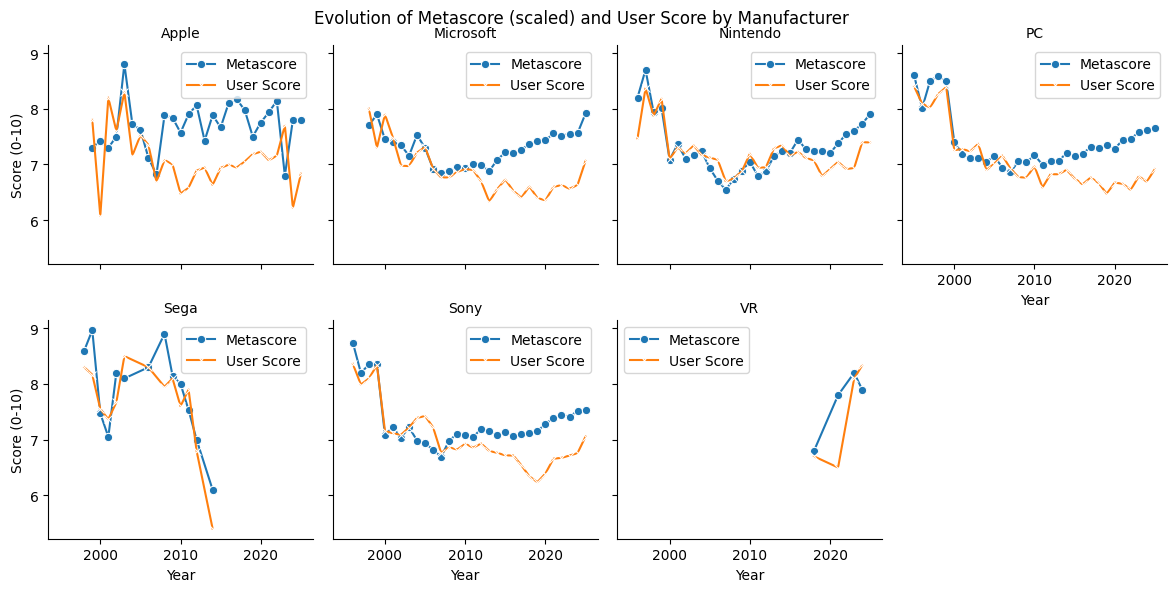

In [29]:
# Small multiples (FacetGrid) of Metascore vs User Score over the years for manufacturers
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data: explode manufacturers and extract year
df_clean['year'] = df_clean['release_date'].dt.year

# Add means per year/manufacturer for metascore_scaled and user_score, and count games
agg = (
    df_clean
    .groupby(['manufacturer', 'year'])
    .agg(
        metascore_mean=('metascore_scaled', 'mean'),
        user_score_mean=('user_score', 'mean'),
        n=('metascore', 'count')
    )
    .reset_index()
)

# Draw FacetGrid with both lines per facet
g = sns.FacetGrid(agg, col='manufacturer', col_wrap=4, sharey=True, height=3.0)
g.map_dataframe(sns.lineplot, x='year', y='metascore_mean', marker='o', color='C0', label ='Metascore')
g.map_dataframe(sns.lineplot, x='year', y='user_score_mean', marker='x', color='C1', label='User Score')

g.set_axis_labels('Year', 'Score (0-10)')
g.set_titles('{col_name}')
for ax in g.axes.flat:
    ax.legend()
plt.subplots_adjust(top=0.92)
g.figure.suptitle(f'Evolution of Metascore (scaled) and User Score by Manufacturer')
plt.show()